# 1 Logistic Regression

In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
df = np.loadtxt("ex2data1.txt", delimiter=",")

In [68]:
X = df[:,:2]
# Add one col to X_norm
X = np.hstack((np.ones([X.shape[0],1]), X))
y = df[:,2]
y.shape = (y.size,1)
X.shape, y.shape

((100, 3), (100, 1))

In [198]:
initial_theta = np.zeros((X.shape[1], 1))
initial_theta.shape

(3, 1)

## 1.1 Visualizing Data

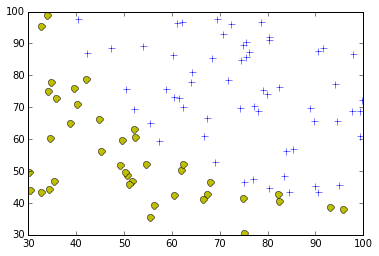

In [70]:
%matplotlib inline
plt.plot(df[:,0][df[:,2] == 1],df[:,1][df[:,2] == 1], "b+", ms=7)
plt.plot(df[:,0][df[:,2] == 0],df[:,1][df[:,2] == 0], "yo",ms=7)

## 1.2 Implementation

### 1.2.1 Warmup exercise: sigmoid function

In [71]:
def sigmoid(z):
    # Logistic regression func, returns probability
    return 1/(1+np.exp(-z))

In [72]:
print(sigmoid(0))
print(sigmoid(np.array([0,0,1,10])))

0.5
[ 0.5         0.5         0.73105858  0.9999546 ]


### 1.2.2 Cost function and gradient

In [229]:
def decorated_costFunction(theta_arg):
    return costFunction(theta_arg, X, y)



def costFunction(theta_arg, X, y):
    J = 0
    m = y.size
    grad = np.zeros((theta_arg.size,1))
    
    h = sigmoid(X.dot(theta_arg))
    h.shape = (h.size,1)
    
    J = (-1.0/m) * sum( y.T.dot(np.log(h)) + (1-y.T).dot(np.log(1-h)) )
    #grad = np.zeros(3)#(1.0/m) * sum((h-y).T.dot(X))
    
    # Fminunc expects single value
    return J#, grad.T.flatten()

100

In [230]:
cost = costFunction(initial_theta, X, y)
print("cost at initial theta 0s", cost)
#print("grad at initial theta 0s", grad)

('cost at initial theta 0s', array([ 0.69314718]))


### 1.2.3 Learning parameters using fminunc

In [257]:
# Minimize using scipy fmin_bfgs
import scipy.optimize as opt

f_theta = opt.fmin(decorated_costFunction, initial_theta, maxiter=400)
print("min values: ",f_theta)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
('min values: ', array([-25.16130062,   0.20623142,   0.20147143]))


In [248]:
print ("cost with optimized theta should be about .203. Result:", costFunction(f_theta, X,y))

('cost with optimized theta should be about .203. Result:', array([ 0.2034977]))


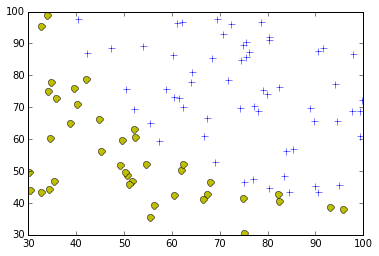

In [202]:
%matplotlib inline
plt.plot(df[:,0][df[:,2] == 1],df[:,1][df[:,2] == 1], "b+", ms=7)
plt.plot(df[:,0][df[:,2] == 0],df[:,1][df[:,2] == 0], "yo",ms=7)
# Todo: Add decisiondecision boundary in below plot


### 1.2.4 Evaluating logistic regression

In [266]:
print("Probability for exam1 45 and exam2 85 should be .776. Result:",sigmoid(f_theta[0] + 45*f_theta[1] + 85*f_theta[2]))

('Probability for exam1 45 and exam2 85 should be .776. Result:', array([ 0.77629159]))


In [280]:
def predict(theta, X):
    theta.shape = (theta.size, 1)
    return np.round(sigmoid(X.dot(theta)))

p = predict(f_theta, X)

print("Train accuracy in %:", np.mean(p==y)*100)

('Train accuracy in %:', 89.0)


# 2 Regularized logistic regression

In [293]:
data = np.loadtxt("ex2data2.txt", delimiter=",")
X = data[:,:2]
y = data[:,2]

# Add one col to X
X = np.hstack((np.ones([X.shape[0],1]), X))

print(X.shape, y.shape)

((118, 3), (118,))


## 2.1 Visualizing data

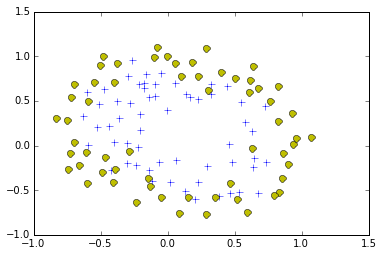

In [298]:
plt.plot(data[:,0][ data[:,2] == 1 ], data[:,1][ data[:,2] == 1 ], "b+", ms=7)
plt.plot(data[:,0][ data[:,2] == 0 ], data[:,1][ data[:,2] == 0 ], "yo",ms=7)
plt.legend = ["X","y"]
plt.show()

## 2.2 Feature Mapping

In [311]:
def map_feature(X1, X2):
    # Map features to all polynomial terma
    degree = 6
    
    out = np.ones(X1.shape[0])
    
    for i in range(1,degree+1):
        for j in range(i+1):
            out[:,
            
        